In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
# Font modification
plt.rcParams['font.sans-serif'] = "Times New Roman"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['font.size'] = 18

In [3]:
results = pd.DataFrame()
for file in [f for f in os.listdir('../data/') if f.startswith('res_') and f.endswith('.csv')]:
    df = pd.read_csv('../data/{}'.format(file), index_col=[0])
    results = pd.concat([results, df], axis=0, sort=False)
    
results['savgol__window_length'] = results['savgol__window_length']+1
results.fillna('NA', inplace=True)


results.drop(['RMSE opt-rmse', 'R2 opt-rmse'], axis=1, inplace=True)
results.rename(columns={'RMSE opt-r2':'RMSE', 'R2 opt-r2':'R2'}, inplace=True)
results.sort_values('RMSE', inplace=True)
results

,alpha,l1_ratio,pca__n_components,savgol__deriv,savgol__polyorder,savgol__wavemax,savgol__wavemin,savgol__window_length,RMSE,R2,preds +/-1,preds +/-2,preds +/-3,preds +/-4,preds +/-6,preds +/-8,preds +/-10,C,epsilon,kernel
elnet,0.0630957,1,32.0,2.0,3.0,1436.0,986.0,13.0,4.732336,0.709241,0.160745,0.338409,0.477157,0.582064,0.776650,0.912014,0.969543,NA,NA,NA
SVM,NA,NA,31.0,1.0,3.0,1446.0,1040.0,13.0,4.836822,0.696260,0.159052,0.301184,0.451777,0.582064,0.774958,0.906937,0.969543,3.16228,0.630957,0


# scores

In [4]:
# Sorted by RMSE
results[['RMSE', 'R2']]

,RMSE,R2
elnet,4.732336,0.709241
SVM,4.836822,0.696260


In [5]:
# Sorted by RMSE
results[['R2', 'RMSE', ]].sort_values('R2', ascending = False)

,R2,RMSE
elnet,0.709241,4.732336
SVM,0.696260,4.836822


In [6]:
# PCA
results[['pca__n_components']]

,pca__n_components
elnet,32.0
SVM,31.0


In [7]:
# Savgol
results[[col for col in results.columns if col.startswith('savgol_')]]

,savgol__deriv,savgol__polyorder,savgol__wavemax,savgol__wavemin,savgol__window_length
elnet,2.0,3.0,1436.0,986.0,13.0
SVM,1.0,3.0,1446.0,1040.0,13.0


In [8]:
# Accuracy
df = results[[col for col in results.columns if col.startswith('preds')]]
df = df*100
df

,preds +/-1,preds +/-2,preds +/-3,preds +/-4,preds +/-6,preds +/-8,preds +/-10
elnet,16.074450,33.840948,47.715736,58.20643,77.664975,91.201354,96.954315
SVM,15.905245,30.118443,45.177665,58.20643,77.495770,90.693739,96.954315


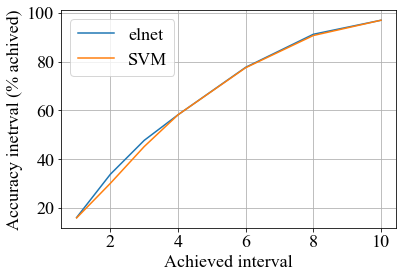

In [9]:

for acc in df.index:
    plt.plot([1,2,3,4,6,8,10], df.loc[acc].values, label=acc)
    #print(df.loc[acc].values)

plt.ylabel('Accuracy inetrval (% achived)')
plt.xlabel('Achieved interval')
plt.grid()
plt.legend()
plt.savefig('results - interval.png', bbox_inches = 'tight')
plt.show()

# Regularization

In [10]:
results[['alpha', 'l1_ratio', 'C', 'epsilon']]

,alpha,l1_ratio,C,epsilon
elnet,0.0630957,1,NA,NA
SVM,NA,NA,3.16228,0.630957
